#### Import Statements:

In [ ]:
#pip install geopandas

In [ ]:
#pip install fsspec

In [ ]:
#pip install mapclassify

In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import fsspec
import mapclassify
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

#### Assigning paths to shapefiles (compressed as .zip files):

In [2]:
parcels_zipfile = r"SSURGO-interpolation-sensitivity-analysis/Shapefiles/ottertail_parcels_clip_4326.zip"
boundary_zipfile = r"SSURGO-interpolation-sensitivity-analysis/Shapefiles/ottertailboundary.zip"
ottertail = gpd.read_file(parcels_zipfile)
ott_boundary = gpd.read_file(boundary_zipfile)

#### Creating dataframes from shapefiles:

In [3]:
with fsspec.open(parcels_zipfile) as file:
    ott_df = gpd.read_file(file)

with fsspec.open(boundary_zipfile) as file:
    bound_df = gpd.read_file(file)

In [4]:
ott_df.head()

,COUNTY_PIN,STATE_PIN,ANUMBERPRE,ANUMBER,ANUMBERSUF,ST_PRE_MOD,ST_PRE_DIR,ST_PRE_TYP,ST_PRE_SEP,ST_NAME,...,rngalg0_12,rngal12_24,rngal24_36,rngal36_48,logrg0_12,logrg12_24,logrg24_36,logrg36_48,area,geometry
0,02000990440000,27111-02000990440000,None,0,None,None,None,None,None,None,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,None,"POLYGON ((-95.65700 46.37054, -95.65700 46.370..."
1,46000990228002,27111-46000990228002,None,0,None,None,None,None,None,None,...,6.570790e-06,5.836280e-06,4.562450e-06,4.390870e-06,6.570770e-06,5.836260e-06,4.562440e-06,4.390860e-06,None,"POLYGON ((-95.65636 46.37032, -95.65638 46.370..."
2,46000990221000,27111-46000990221000,None,28141,None,None,None,State Highway,None,78,...,2.379890e-07,2.186330e-07,1.709670e-07,1.679040e-07,2.379890e-07,2.186330e-07,1.709670e-07,1.679040e-07,None,"POLYGON ((-95.65520 46.37146, -95.65544 46.371..."
3,46000990803000,27111-46000990803000,None,28096,None,None,None,None,None,Fairway,...,4.645250e-01,1.536320e-01,1.900580e-01,1.528440e-01,3.815310e-01,1.429150e-01,1.740020e-01,1.422320e-01,None,"POLYGON ((-95.65367 46.37014, -95.65376 46.370..."
4,46000990228001,27111-46000990228001,None,28071,None,None,None,State Highway,None,78,...,2.631750e-06,2.345530e-06,1.833650e-06,1.768390e-06,2.631750e-06,2.345530e-06,1.833650e-06,1.768390e-06,None,"POLYGON ((-95.65640 46.37028, -95.65650 46.370..."


#### Creating GeoDataFrames from shapefile DataFrames:

In [5]:
ott_gdf = gpd.GeoDataFrame(ott_df)
bound_gdf = gpd.GeoDataFrame(bound_df)

#### Setting coordinate systems of GeoDataFrames, corresponding to their original crs:

In [6]:
ott_gdf.crs = "EPSG:4326" # Ottertail parcels shapefile w/ AWS data 
bound_gdf.crs = "EPSG:26915" # Ottertail boundary shapefile

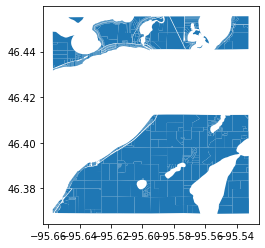

In [7]:
ott_gdf.plot()

#### Reprojecting the Ottertail Boundary to EPSG 4326 (so both layers share the same crs):

In [8]:
boundary_4326 = bound_gdf.to_crs(4326)

In [9]:
ott_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
boundary_4326.crs == ott_gdf.crs

True

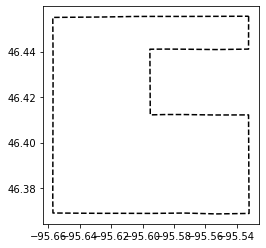

In [11]:
boundary_4326.boundary.plot(linestyle='dashed',
                           cmap='gray')

### Plotting the range in AWS values between all spatial interpolation algorithms, at the soil depth intervals of 0-12in, 12-24in, 24-36in, and 36-48in

##### Exporting 0-12in map:

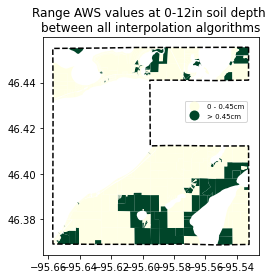

In [16]:
rng0_12 = ottertail.plot(
    column='rngalg0_12',
    scheme="User_Defined",
    cmap="YlGn",
    legend=True,
    legend_kwds={'bbox_to_anchor': (.96,.725),
                 'labels' : ['0 - 0.45cm', '> 0.45cm'],
                 'fontsize':'x-small'},
    classification_kwds=dict(bins=[0.45])
)
rng0_12.set_title(
    "Range AWS values at 0-12in soil depth \nbetween all interpolation algorithms")
final_0_12 = boundary_4326.boundary.plot(
    ax = rng0_12,
    linestyle='dashed',
    cmap='gray')
plt.savefig("range_AWS_AllAlgs_0_12in.png",dpi=300)

##### Exporting 12-24in map:

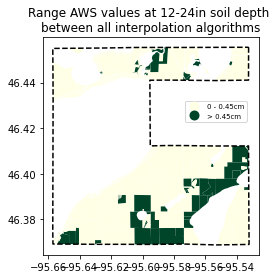

In [17]:
rng12_24 = ottertail.plot(
    column='rngal12_24',
    scheme="User_Defined",
    cmap="YlGn",
    legend=True,
    legend_kwds={'bbox_to_anchor': (.96,.725),
                 'labels' : ['0 - 0.45cm', '> 0.45cm'],
                 'fontsize':'x-small'},
    classification_kwds=dict(bins=[0.45])
)
rng12_24.set_title(
    "Range AWS values at 12-24in soil depth \nbetween all interpolation algorithms")
final_12_24 = boundary_4326.boundary.plot(
    ax = rng12_24,
    linestyle='dashed',
    cmap='gray')
plt.savefig("range_AWS_AllAlgs_12_24in.png",dpi=300)

##### Exporting 24-36in map:

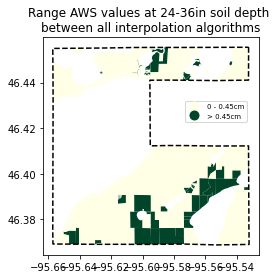

In [18]:
rng24_36 = ottertail.plot(
    column='rngal24_36',
    scheme="User_Defined",
    cmap="YlGn",
    legend=True,
    legend_kwds={'bbox_to_anchor': (.96,.725),
                 'labels' : ['0 - 0.45cm', '> 0.45cm'],
                 'fontsize':'x-small'},
    classification_kwds=dict(bins=[0.45])
)
rng24_36.set_title(
    "Range AWS values at 24-36in soil depth \nbetween all interpolation algorithms")
final_24_36 = boundary_4326.boundary.plot(
    ax = rng24_36,
    linestyle='dashed',
    cmap='gray')
plt.savefig("range_AWS_AllAlgs_24_36in.png",dpi=300)

##### Exporting 36-48in map:

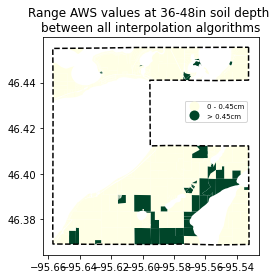

In [19]:
rng36_48 = ottertail.plot(
    column='rngal36_48',
    scheme="User_Defined",
    cmap="YlGn",
    legend=True,
    legend_kwds={'bbox_to_anchor': (.96,.725),
                 'labels' : ['0 - 0.45cm', '> 0.45cm'],
                 'fontsize':'x-small'},
    classification_kwds=dict(bins=[0.45])
)
rng36_48.set_title(
    "Range AWS values at 36-48in soil depth \nbetween all interpolation algorithms")
final_36_48 = boundary_4326.boundary.plot(
    ax = rng36_48,
    linestyle='dashed',
    cmap='gray')
plt.savefig("range_AWS_AllAlgs_36_48in.png",dpi=300)